In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
    return x**2 + np.exp(x) + y**2 - x*y

def g(x, y):
    return x**2 + 2 * y**2

In [3]:
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-2, 2, 100)

In [4]:
# Setup
alpha = 1.07
beta = 9.52
L = 14.67
x1 = (-1, 1)

In [5]:
def gamma1(L, T, x_opt, x1, beta, k):
    return np.linalg.norm([x_opt[0] - x1[0], x_opt[1] - x1[1]]) / (np.sqrt(T) * L + 1e-10)

def gamma2(L, T, x_opt, x1, beta, k):
    return 1 / beta

def gamma3(L, T, x_opt, x1, beta, k):
    return 2 / (alpha * (k + 1))

In [6]:
def project_to_circle(x, y):
    norm = np.linalg.norm(x + y)
    return (np.sqrt(1.5) * x) / norm, (np.sqrt(1.5) * y) / norm

def project_to_square(x, y):
    return np.sign(x) * np.minimum(np.abs(x), 1), np.sign(y) * np.minimum(np.abs(y), 1)

def project_to_line(Ax, Ay, Bx, By, x, y):
    t = np.dot(np.array([Bx - Ax, By - Ay]), np.array([x - Ax, y - Ay]).reshape((-1, 1))) / np.linalg.norm([Bx - Ax, By - Ay]) ** 2
    if t <= 0:
        return Ax, Ay
    if t >= 1:
        return Bx, By
    
    return Ax + t * (Bx - Ax), Ay + t * (By - Ay)

def project_to_triangle(x, y):
    Ax, Ay = -1, -1
    Bx, By = 1.5, -1
    Cx, Cy = -1, 1.5
    
    if y <= -1 and y < x:
        return project_to_line(Ax, Ay, Bx, By, x, y)
    if x <= -1 and x < y:
        return project_to_line(Cx, Cy, Ax, Ay, x, y)
    return project_to_line(Bx, By, Cx, Cy, x, y)

def project(x, y, domain):
    if domain == "circle":
        return project_to_circle(x, y)
    if domain == "square":
        return project_to_square(x, y)
    if domain == "triangle":
        return project_to_triangle(x, y)

In [7]:
def grad_f(x, y):
    return 2*x + np.exp(x) - y, 2*y - x

def grad_d(x, y):
    return 2*x, 4*y

In [8]:
project_to_circle(2, 0)
project_to_square(3, 0)
project_to_line(1.5, -1, -1, 1.5, 1, 0)

project_to_triangle(-2, 1)

(array([-1.]), array([1.]))

In [9]:
def minimum(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-1, 1, 1000)
    ys = np.linspace(-1, 1, 1000)
    X, Y = np.meshgrid(xs, ys)  
    Z = f(X, Y)  
    
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)  
    bx, by, bz = X[min_idx], Y[min_idx], Z[min_idx]
    
    print(bx, by, bz)

In [10]:
minimum(f)

-0.43343343343343343 -0.2172172172172172 0.7891781013303545


In [11]:
def pgd(x0, y0, domain, gamma_fn, fn, grad_fn):
    x, y = x0, y0
    
    x_opt = np.array([-0.43343343, -0.217217])
    if fn == g:
        x_opt = np.array([0, 0])
    
    for i in range(10):
        lr = gamma_fn(L, i, x_opt, np.array([x, y]), beta, i)
        # print(lr)
        dx, dy = grad_fn(x, y)
        x = x - lr * dx
        y = y - lr * dy
        
        x, y = project(x, y, domain)
    
    print(domain, x,y, fn(x,y))
    return x, y            

In [12]:
opts = []
x0, y0 = -1, 1
for fun in [(f, grad_f), (g, grad_d)]:
    print()
    for d in ["circle", "square", "triangle"]:  
        for gamma in [gamma1, gamma2, gamma3]:
            x_opt, y_opt = pgd(x0, y0, d, gamma, fun[0], fun[1])
            opts.append((x_opt, y_opt, fun[0](x_opt, y_opt)))


circle -1.0385170675695883 -0.18622780382200058 1.2737769620251507
circle -2.6120858521388275 1.3873409807472386 12.444942565139588
circle -0.7143695306410957 -0.5103753407504934 0.8957108518105954
square -0.005540718663055069 -0.4417810044601094 1.1872279740169063
square -0.355701139323922 -0.08418420993529793 0.8043478575732265
square -0.432720522409009 -0.2164590692849873 0.7891770729084704
triangle [0.2989429] [0.2010571] [1.41811884]
triangle [0.06255102] [0.43744898] [1.23246013]
triangle [0.07103741] [0.42896259] [1.23220422]

circle 0.4866386453957337 0.7381062259958554 1.326418772900284
circle -1.2830147369627554 0.05826986557116631 1.652917569730972
circle 2.0052470789226366 -3.2299919503142256 24.88671184571716
square 0.5346635534256011 -0.2621792067866896 0.4233409883042861
square -0.09458209339551883 0.0042955748744111 0.00898267631808199
square 0.0001209493772140425 -2.015845512241763e-05 1.5441478474309793e-08
triangle [0.68165215] [-0.18165215] [0.53064467]
triangle [0

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [14]:
x = np.linspace(-2, 2, 100)  # 100 points from -5 to 5
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)      # Create a 2D grid
Z = f(X, Y)                   # Compute Z = f(X, Y) for each (x, y)

In [15]:
x_opt, y_opt, f(x_opt, y_opt)

(array([0.33337325]), array([0.16662675]), array([1.47902144]))

In [16]:
len(opts)

18

TypeError: unsupported format string passed to numpy.ndarray.__format__

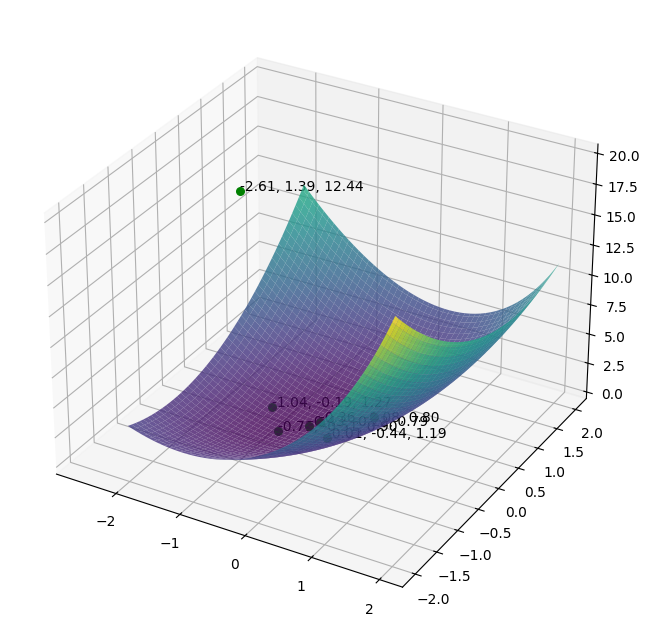

In [23]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
for x_opt, y_opt, z_opt in opts[:9]:
    ax.scatter(x_opt, y_opt, z_opt, c="green", s=30)
    ax.text3D(x_opt, y_opt, z_opt, f"{x_opt:.2f}, {y_opt:.2f}, {z_opt:.2f}")

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f"{minimum(f)}")

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

In [24]:
a = [[3.0, 10, 30],
     [0.1, 10, 35],
     [3, 10, 30],
     [0.1, 10, 35]]

c = [1.0, 1.2, 3.0, 3.2]

p = [[0.3689, 0.1170, 0.2673],
     [0.4699, 0.4387, 0.7479],
     [0.1091, 0.8732, 0.5547],
     [0.03815, 0.5743, 0.8828]]

In [27]:
def g(z):
    res = 0
    for i in range(len(c)):
        res += c[i] * np.exp(
            -np.sum([a[i][j] * (z[j] - p[i][j])**2 for j in range(3)])
        )
    return res
    
g([.1, .2, .3])

np.float64(0.7328944029304731)

In [ ]:
def pgd(x0, y0, z0, domain, gamma_fn, fn, grad_fn):
    x, y, z = x0, y0, z0
    
    x_opt = np.array([-0.43343343, -0.217217])
    if fn == g:
        x_opt = np.array([0, 0])
    
    for i in range(10):
        lr = gamma_fn(L, i, x_opt, np.array([x, y]), beta, i)
        # print(lr)
        dx, dy = grad_fn(x, y)
        x = x - lr * dx
        y = y - lr * dy
        
        x, y = project(x, y, domain)
    
    print(domain, x,y, fn(x,y))
    return x, y       